### ***Titanic Classification***

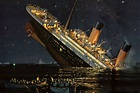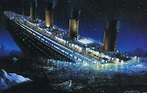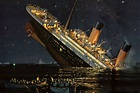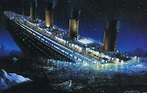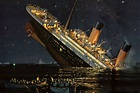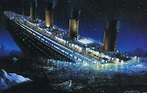

#### ***About Project***

The sinking of the Titanic in 1912 is one of the most infamous shipwrecks in history. Despite limited lifeboat capacity,some passengers were more likely to survive than others. This project aims to predict the likelyhood of survival for passengers aboard the titanic using machine learning techniques.
Project Goals:

Prediction Objective: Utilize various machine learning models to predict whether a passenger survived or not.
Dataset Exploration: Analyze a dataset containing information about Titanic passengers, such as age, gender, class, and more.
Model Comparison: Evaluate the performance of different classification models to determine the most effective predictor.
Dataset Description:

The dataset consists of 891 rows and 8 columns. The target variable, 'Survived,' denotes whether a passenger survived (1) or not (0).

#### ***Steps***

Importing Libraries

Data Collection

Data Analysis

Data Cleaning

Data Modeling

Testing


#### ***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

#### ***Loading Dataset***

In [2]:
data_titanic = pd.read_csv("titanic_train.csv")

In [3]:
# To see length of dataset
len(data_titanic)

891

In [4]:
#This is default function which will give the first 5 rows of the dataset
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#To know about the index of the data
data_titanic.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
#We can see the columns of this dataset using .columns attribute
data_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#The info() method will give the information about dataset
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_titanic.shape

(891, 12)

In [9]:
#We can see the data types of each column using attribute dtypes
data_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#describe() method will give the summary of stats of the dataset
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### ***Data Analysis***

we'll import seaborn for visually analyzing the data and to find out how many survived vs died using countplot method of seaborn

In [11]:
#countplot of survived vs not survived

<Axes: xlabel='Survived', ylabel='count'>

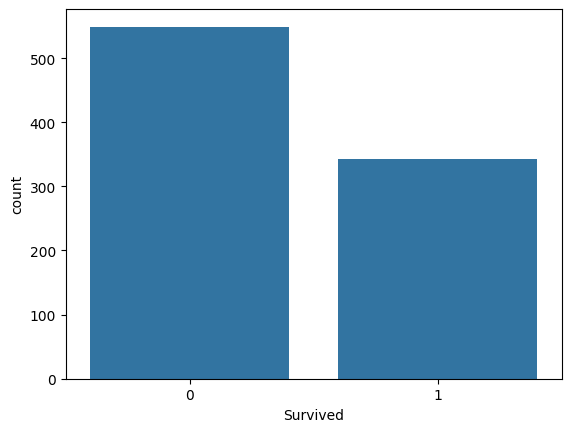

In [12]:
sns.countplot(x='Survived',data=data_titanic)

Here, from above countplot we can see that the number of survived passengers is less than the no of not survived passengers but from this countplot I'm not able to see how many male passengers survived and how many female passengers survived. So now I'm going to plot another countplot which will tell me the no of male and female passengers that are survived and not survived.

**Male vs Female Survival**

In [13]:
#Male vs Female survived

<Axes: xlabel='Survived', ylabel='count'>

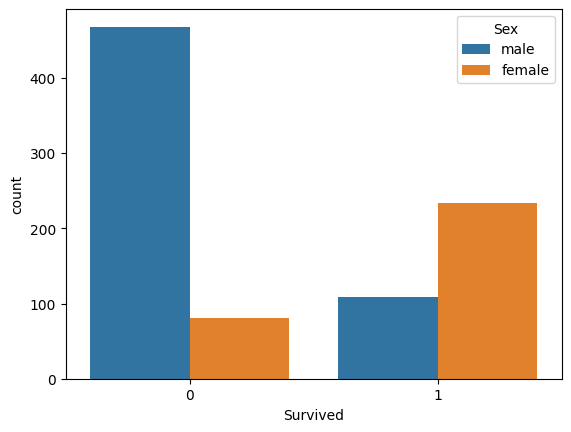

In [14]:
sns.countplot(x='Survived',data=data_titanic,hue='Sex')

In [15]:
#check for null

In [16]:
data_titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#check how many values are null

In [18]:
data_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Visualize null values

<Axes: >

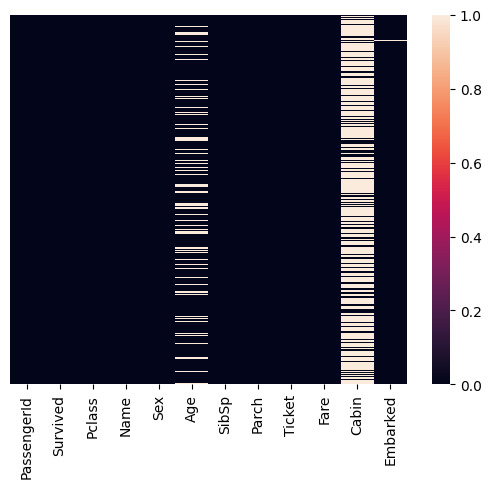

In [20]:
sns.heatmap(data_titanic.isna(),yticklabels=False)

From above heatmap we can see that the null values are strongly appeared in cabin column and in age column also but not as strong as cabin column so thats how we visualize the null values in our dataset. so now in order to make a conclusion about null values whether or not we're going to delete this null values or discard this null values or we're going to impute this columns is depends on the the percentage of null values which are appearing in our dataset.

In [21]:
#find the % of null values in age column

In [22]:
(data_titanic['Age'].isna().sum()/len(data_titanic['Age']))*100

19.865319865319865

In [23]:
#find the % of null values in cabin column

In [24]:
(data_titanic['Cabin'].isna().sum()/len(data_titanic['Cabin']))*100

77.10437710437711

In [25]:
#find the distribution for the age column

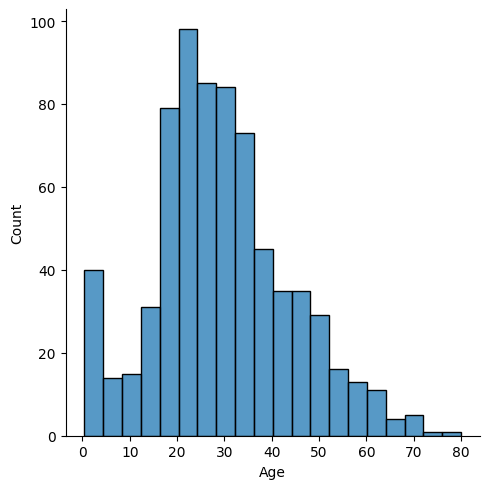

In [26]:
sns.displot(x='Age',data=data_titanic)

#### ***Data Cleaning***

Now we'll fill the missing values for age. in order to feel missing values we'll use fillna method.
for now we'll fill the missing age by taking average of all age

In [27]:
#fill age column

In [28]:
data_titanic['Age'].mean()

29.69911764705882

In [29]:
data_titanic['Age'].fillna(data_titanic['Age'].mean(),inplace=True)

**We'll verify null values exist or not**
Now we'll verify if there are any null values present in the dataset or not

In [30]:
#verify null values

In [31]:
data_titanic['Age'].isna().sum()

0

**We will visualise the null value using heatmap**

we will use heatmap method by passing only records which are null

<Axes: >

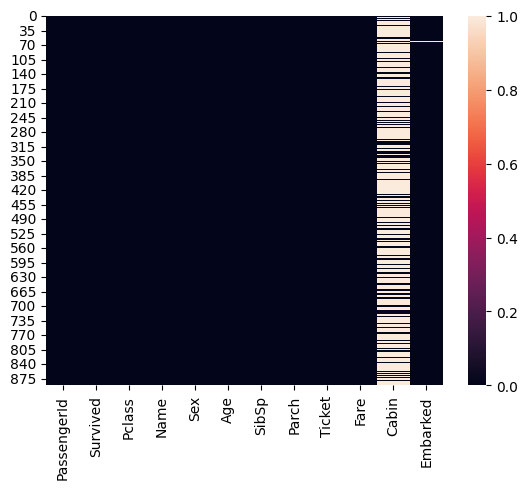

In [32]:
sns.heatmap(data_titanic.isna())

**We can see that cabin column has a lot of null values and as such we cannot use it for prediction so we'll drop that column**

In [33]:
#drop cabin column

In [34]:
data_titanic.drop('Cabin',axis=1,inplace=True)

In [35]:
#inorder to see if cabin column is drop or not we'll see the contents of the data

In [36]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### ***Preparing Data For Model***

Now we'll need to convert all Categorical columns to numerical.

In [37]:
#Check for the non numeric columns

In [38]:
data_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Now we can see Name,Sex,Ticket and Embarked are categorical columns and they're
not that useful for machine learning prediction hence we'll eventully drop it.
For now we would convert Sex Column to dummies numerical values

In [39]:
#Convert Sex column to numerical values

In [40]:
gender=pd.get_dummies(data_titanic['Sex'],drop_first=True)

In [41]:
data_titanic.fillna(value=0,inplace=True)

In [42]:
gender.replace({True:1, False:0}, inplace=True)

In [43]:
data_titanic['gender']=gender

In [44]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [45]:
#drop the columns which are not required

In [46]:
data_titanic.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [47]:
data_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [48]:
#separate dependent and independent variables

In [49]:
x=data_titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','gender']]
y=data_titanic['Survived']

In [50]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

***Data Modelling***

Building model using Logestic Regression, Support vector machine and Random forest Regressor

**Splitting the data into training and test set using train_test_split**

In [52]:
#train test split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#### ***Logistic Regression***

Logistic regression is a statistical method used for binary classification problems, where the target variable has two possible outcomes.Its commonly used in macing learning for tasks predicting yes/no, true/false, or 0/1 outcomes.
Unlike linear regression, which predicts continuous values, logistic regression uses the logistic function(also known as sigmoid function)to map input features to a probability score between 0 and 1. This probability represents the likelihood of belonging to a particular class.

In [54]:
#import logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
#fit logistic regression

In [57]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predict=lr.predict(x_test)

***Testing***

see how our model is performing

In [58]:
#print confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


In [61]:
#import classification report

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



#### ***Support Vector Classifier***

The Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks. It's part of the Support Vector Machines (SVM) family.
SVC works by finding the optimal hyperplane that best separates different classes in the feature space. This hyperplane maximizes the margin, which is the distance between the hyperplane and the closest data points from each class (called support vectors). The objective is to achieve a decision boundary that generalizes well to new, unseen data.
The algorithm can handle linear and non-linear classification tasks by using different kernel functions like linear, polynomial, radial basis function (RBF), etc. These kernels allow the SVC to map the input space into higher dimensions, making it possible to separate non-linearly separable classes in the transformed space.

In [64]:
from sklearn.svm import SVC
SVM =SVC()
SVM.fit(x_train, y_train)
SVM_pred = SVM.predict(x_test)
print("Support Vector Classifier:")
print(classification_report(y_test, SVM_pred))

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       175
           1       0.67      0.10      0.17       120

    accuracy                           0.61       295
   macro avg       0.64      0.53      0.46       295
weighted avg       0.63      0.61      0.51       295



#### ***Random Forest Classifier***

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks or the mode for classification tasks. Random forest is a popular choice in machine learning due to its simplicity, robustness, and effectiveness in various types of data and tasks, including regression and classification problems.

In [65]:
#Random forest classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test,rf_pred))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       175
           1       0.84      0.68      0.75       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.81       295



#### ***Conclusion***

So, In this dataset we've apply Logistic regression, support vector classifier and Random forest classifier one by one on our data, we can conclude that we got better accuracy in random forest model which is 0.81 as compare to other two models so it is best to use Random Forest Classifier instead of Support vector Classifier and Lgistic Regression model. Thus the machine learning model to predict the Titanic survival rate based on given dataset is executed successfully using Random Forest Classifier,Logistic Regression and Support Vector Classifier. 